# EDA on Netflix Dataset

## Data is obtained from https://www.kaggle.com/datasets/shivamb/netflix-shows

### Load the data

In [60]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from wordcloud import WordCloud

df = pd.read_csv(r"C:\Users\saiso\OneDrive\Desktop\Datasets\netflix_titles.csv")
df.head()

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 8.8 MB/s eta 0:00:00


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning

### Checking column names

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(8807, 12)

### Checking missing values

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Treating null values

In [10]:
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')
df['country'] = df['country'].fillna('No Data')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])  
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('No Data')

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Checking duplicated values

In [13]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Data Visualization

### 1. Netflix content in % (TV show & Movies)

In [32]:
type_count = list(df['type'].value_counts())
colors = ['blue','red']
type_ls = list(df['type'].value_counts().index)
fig = px.pie(values=type_count,names=type_ls)
fig.update_layout(title_text='Netflix Content', title_x=0.5)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value',marker=dict(colors=colors))

<div class="alert alert-block alert-danger">
<b>Insight:</b> Almost 7 out of 10 people like to watch Movies rather than TV show.
</div>

### 2. Content by rating

In [34]:
rating_counts = list(df['rating'].value_counts())
rating_ls = list(df['rating'].value_counts().index)
fig = px.pie(df,values=rating_counts,names=rating_ls, hole=0.5,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Rating of Shows', title_x=0.5)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

### 3. Movies count by country

In [41]:
country_counts_df = pd.DataFrame({'Country': country_counts.index, 'MovieCount': country_counts.values})
country_counts_df

,Country,MovieCount
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


<div class="alert alert-block alert-danger">
<b>Insight:</b> The countries with highest movie count is USA (2818), followed by India(972) and next by united kingdom(419).
</div>

### 4. Top 10 Actors

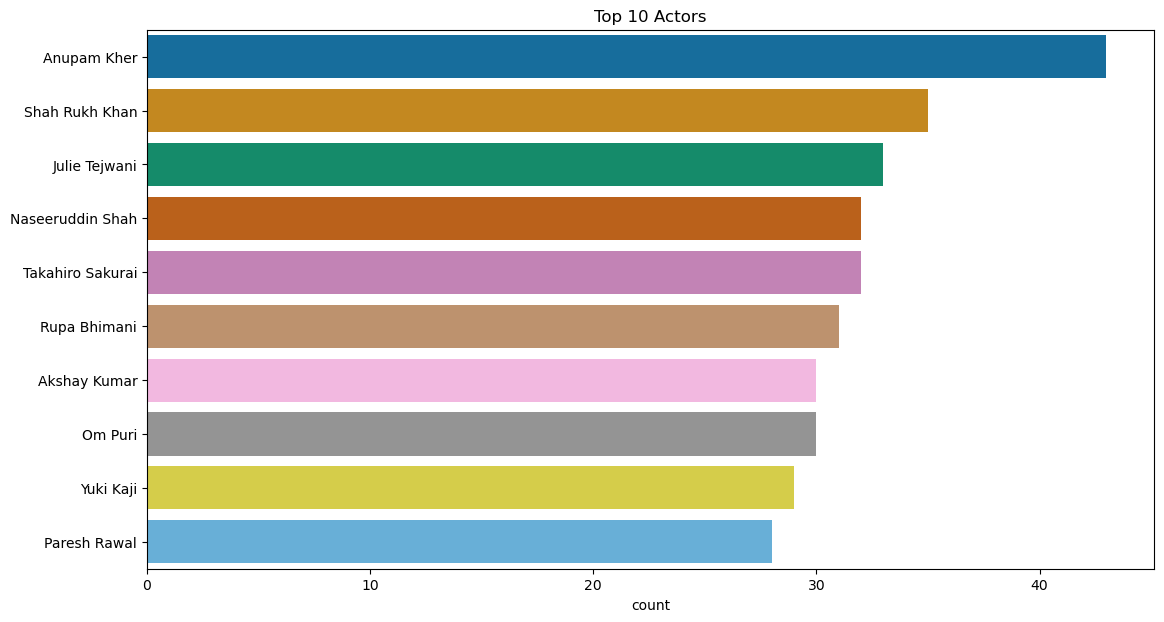

In [53]:
filtered_cast_movie = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actors')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='colorblind')
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b> The actor with most number of titles on movies released on netfilx is Anupam Kher and followed by Shah Rukh Khan and in next place is Julie Tejwani.
</div>

### 5. Top 10 Directors

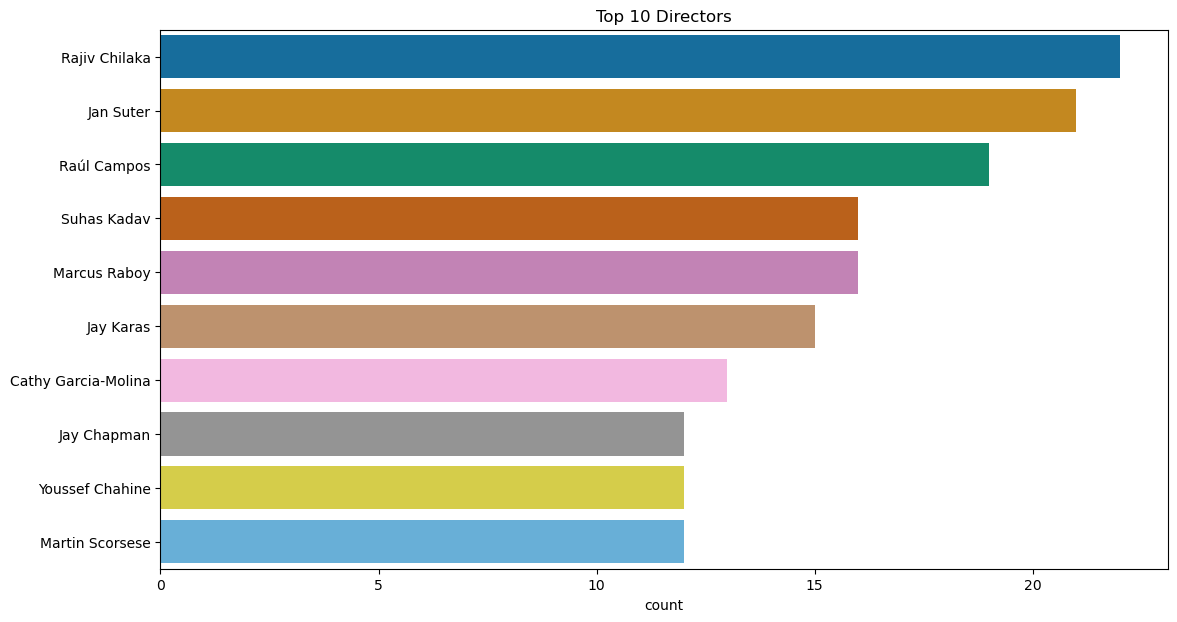

In [54]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Directors')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='colorblind')
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b> Rajiv Chilaka is the most contributed director to netflix followed by Jan Suter and Raul Campos.
</div>

### 6. Genre count

In [58]:
listed_types = []
for row,items in df.iterrows():
    for item in items['listed_in'].split(","):
        if item.strip() not in listed_types:
            listed_types.append(item.strip())
listed_types,len(listed_types)

(['Documentaries',
  'International TV Shows',
  'TV Dramas',
  'TV Mysteries',
  'Crime TV Shows',
  'TV Action & Adventure',
  'Docuseries',
  'Reality TV',
  'Romantic TV Shows',
  'TV Comedies',
  'TV Horror',
  'Children & Family Movies',
  'Dramas',
  'Independent Movies',
  'International Movies',
  'British TV Shows',
  'Comedies',
  'Spanish-Language TV Shows',
  'Thrillers',
  'Romantic Movies',
  'Music & Musicals',
  'Horror Movies',
  'Sci-Fi & Fantasy',
  'TV Thrillers',
  "Kids' TV",
  'Action & Adventure',
  'TV Sci-Fi & Fantasy',
  'Classic Movies',
  'Anime Features',
  'Sports Movies',
  'Anime Series',
  'Korean TV Shows',
  'Science & Nature TV',
  'Teen TV Shows',
  'Cult Movies',
  'TV Shows',
  'Faith & Spirituality',
  'LGBTQ Movies',
  'Stand-Up Comedy',
  'Movies',
  'Stand-Up Comedy & Talk Shows',
  'Classic & Cult TV'],
 42)

In [68]:
listed_types,len(listed_types)
df['listed_in'].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

In [70]:
nums = [0]*len(listed_types)
for row,items in df.iterrows():
    for item in items['listed_in'].split(","):
        index = listed_types.index(item.strip())
        nums[index]+=1

df_listing = pd.DataFrame({"Type":listed_types,"Count":nums})
df_listing.sort_values(by="Count")

,Type,Count
35,TV Shows,16
41,Classic & Cult TV,28
40,Stand-Up Comedy & Talk Shows,56
39,Movies,57
23,TV Thrillers,57
36,Faith & Spirituality,65
33,Teen TV Shows,69
34,Cult Movies,71
28,Anime Features,71
10,TV Horror,75


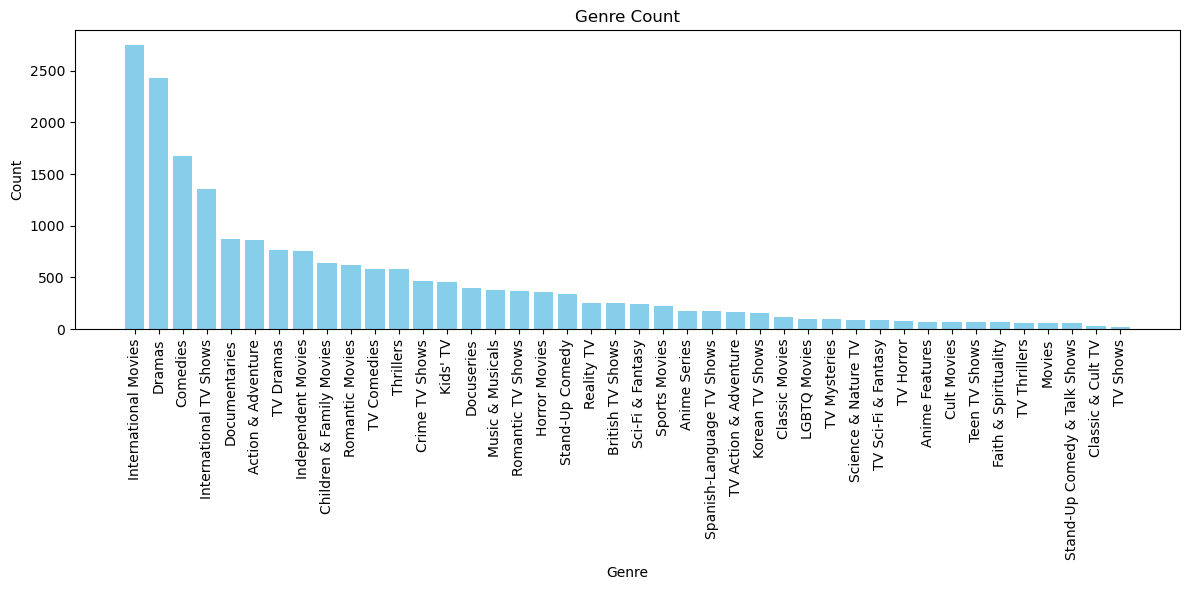

In [80]:
df_listing_sorted = df_listing.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_listing_sorted['Type'], df_listing_sorted['Count'], color='skyblue')
plt.title('Genre Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b> Internationsl Movies has the highest count among all genre followed by Dramas as second and Comedies as third place.
</div>

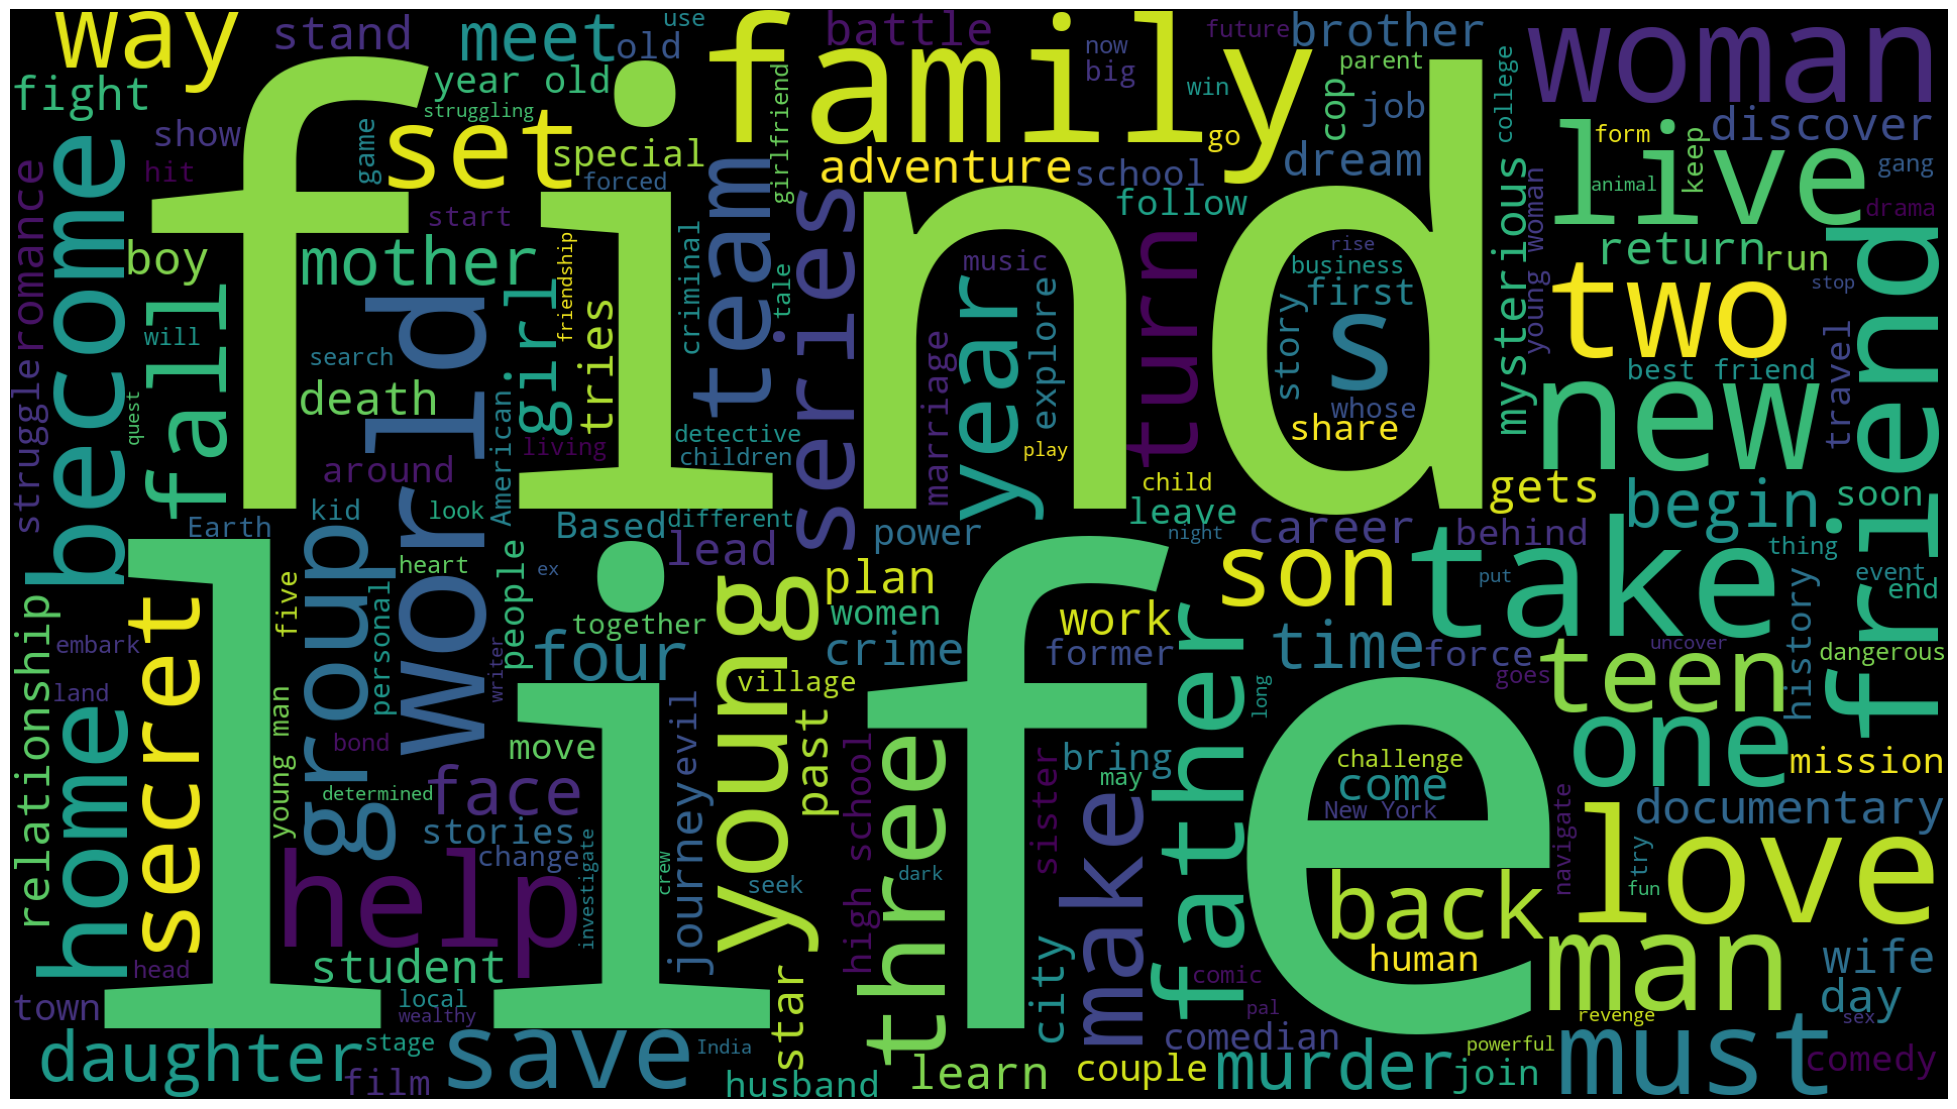

In [62]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()